In [57]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("new.xlsx") 
df.head()

Unnamed: 0   Brand  AMS Campaign ID  Campaign Budget Campaign Start Date  \
0           0  Legacy  148975094189514             40.0          2017-07-15   
1           1  Legacy  148975094189514             40.0          2017-07-15   
2           2  Legacy  148975094189514             40.0          2017-07-15   
3           3  Legacy  148975094189514             40.0          2017-07-15   
4           4  Legacy  148975094189514             40.0          2017-07-15   

  Campaign Status      Campaign Type  Clicks  Cost Targeting type  ...  \
0          paused  sponsoredProducts       0   0.0           auto  ...   
1          paused  sponsoredProducts       0   0.0           auto  ...   
2          paused  sponsoredProducts       0   0.0           auto  ...   
3          paused  sponsoredProducts       0   0.0           auto  ...   
4          paused  sponsoredProducts       0   0.0           auto  ...   

   Conversions 14D  Sales 14D Units 14D  Strategy  report days since start  \
0                0        0.0       0.0     Brand                   1721.0   
1                0        0.0       0.0     Brand                   1728.0   
2                0        0.0       0.0     Brand                   1735.0   
3                0        0.0       0.0     Brand                   1742.0   
4                0        0.0       0.0     Brand                   1693.0   

   report year report month  report day  report weekday  report quarter  
0         2022            4           1               4               2  
1         2022            4           8               4               2  
2         2022            4          15               4               2  
3         2022            4          22               4               2  
4         2022            3           4               4               1  

[5 rows x 23 columns]

In [58]:
df['Brand'].value_counts()

Flossy           68300
Winter's Dawn    62042
Cry-Babies       61189
Little Fixes     59649
Ennematic        59462
BBP              56941
Healthy          49330
Witch A Way      48806
Moni Soon        45912
Perfect Viz      42381
Pain A Way       40874
Coughers         20345
Sickies          19794
AD               19238
Silky Skin       16275
Legacy           12923
New Teeth        12686
Noxious          10672
Grind A Way       8658
Orange            8563
No Wax            7733
Stomach Cure      7727
No-Sneeze         7698
Buggy             7614
Throat Sore       6250
Bushes            6237
UTI Away          4950
Casprin           4320
Baby Juice        3850
Hearty            3848
Insomnia          2625
Perkins           2405
Pro B             1680
Sleepy            1443
Chaf               962
Denture-Fit        962
Lippy              962
Throat Secret      481
Dirty-Mouth        481
Name: Brand, dtype: int64

In [3]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [59]:
A = df.groupby(['Brand','Report Date'],as_index=False)['Sales 14D'].sum()
A = pd.DataFrame(A)
A.columns=['Brand','Report_Date','Sales']
A.head()

Brand Report_Date   Sales
0    AD  2021-01-01   36.28
1    AD  2021-01-02  102.76
2    AD  2021-01-03  167.34
3    AD  2021-01-04   78.92
4    AD  2021-01-05  588.98

In [60]:
mySeries = []
namesofMySeries = []
for brand in A['Brand'].unique():
    namesofMySeries.append(brand)
    B = A.loc[A['Brand'] == brand]
    B = B.loc[:,["Report_Date","Sales"]]
    B.set_index("Report_Date",inplace=True)
    B.sort_index(inplace=True)
    print(len(B))
    mySeries.append(B)
print(len(mySeries))
print(len(namesofMySeries))

481
481
481
481
481
480
481
481
285
481
481
481
481
481
285
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
39
39


In [61]:
print(mySeries[0])
print(namesofMySeries[0])

              Sales
Report_Date        
2021-01-01    36.28
2021-01-02   102.76
2021-01-03   167.34
2021-01-04    78.92
2021-01-05   588.98
...             ...
2022-04-22   901.58
2022-04-23   975.76
2022-04-24   968.56
2022-04-25   819.26
2022-04-26     0.00

[481 rows x 1 columns]
AD


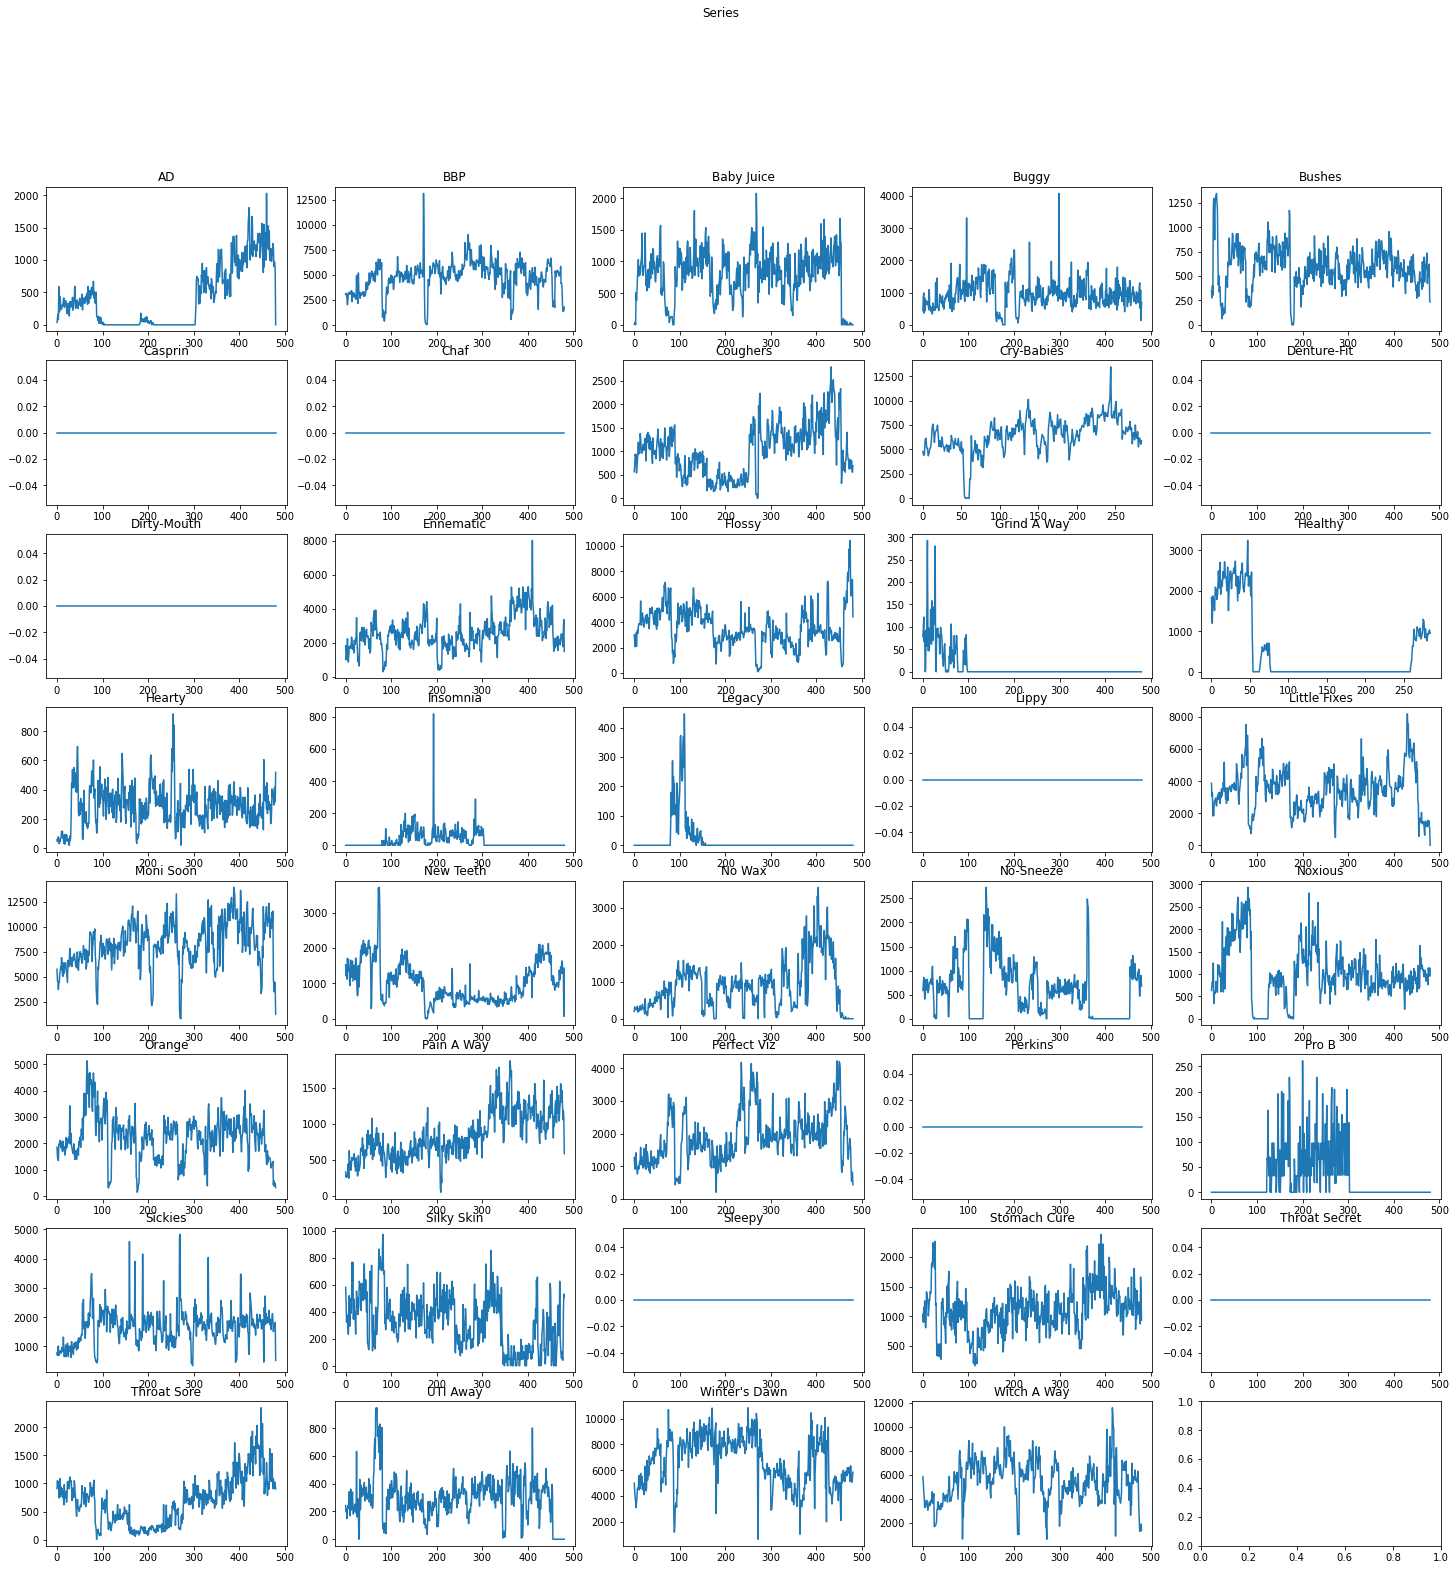

In [65]:
fig, axs = plt.subplots(8,5,figsize=(25,25))
fig.suptitle('Series')
for i in range(8):
    for j in range(5):
        if i*5+j+1>len(mySeries): # pass the others that we can't fill
            continue
        axs[i, j].plot(mySeries[i*5+j].values)
        axs[i, j].set_title(namesofMySeries[i*5+j])
plt.show()

In [162]:
mySeries = []
namesofMySeries = []
for brand in A['Brand'].unique():
    if brand not in ['Lippy', 'Perkins', 'Casprin', 'Chaf', 'Sleepy', 'Throat Secret', 'Denture-Fit', 'Dirty-Mouth']:
        namesofMySeries.append(brand)
        B = A.loc[A['Brand'] == brand]
        B = B.loc[:,["Report_Date","Sales"]]
        B.set_index("Report_Date",inplace=True)
        B.sort_index(inplace=True)
        print(len(B))
        mySeries.append(B)
print(len(mySeries))
print(len(namesofMySeries))

481
481
481
481
481
481
285
481
481
481
285
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
481
31
31


In [163]:
print(mySeries[0])
print(namesofMySeries[0])

              Sales
Report_Date        
2021-01-01    36.28
2021-01-02   102.76
2021-01-03   167.34
2021-01-04    78.92
2021-01-05   588.98
...             ...
2022-04-22   901.58
2022-04-23   975.76
2022-04-24   968.56
2022-04-25   819.26
2022-04-26     0.00

[481 rows x 1 columns]
AD


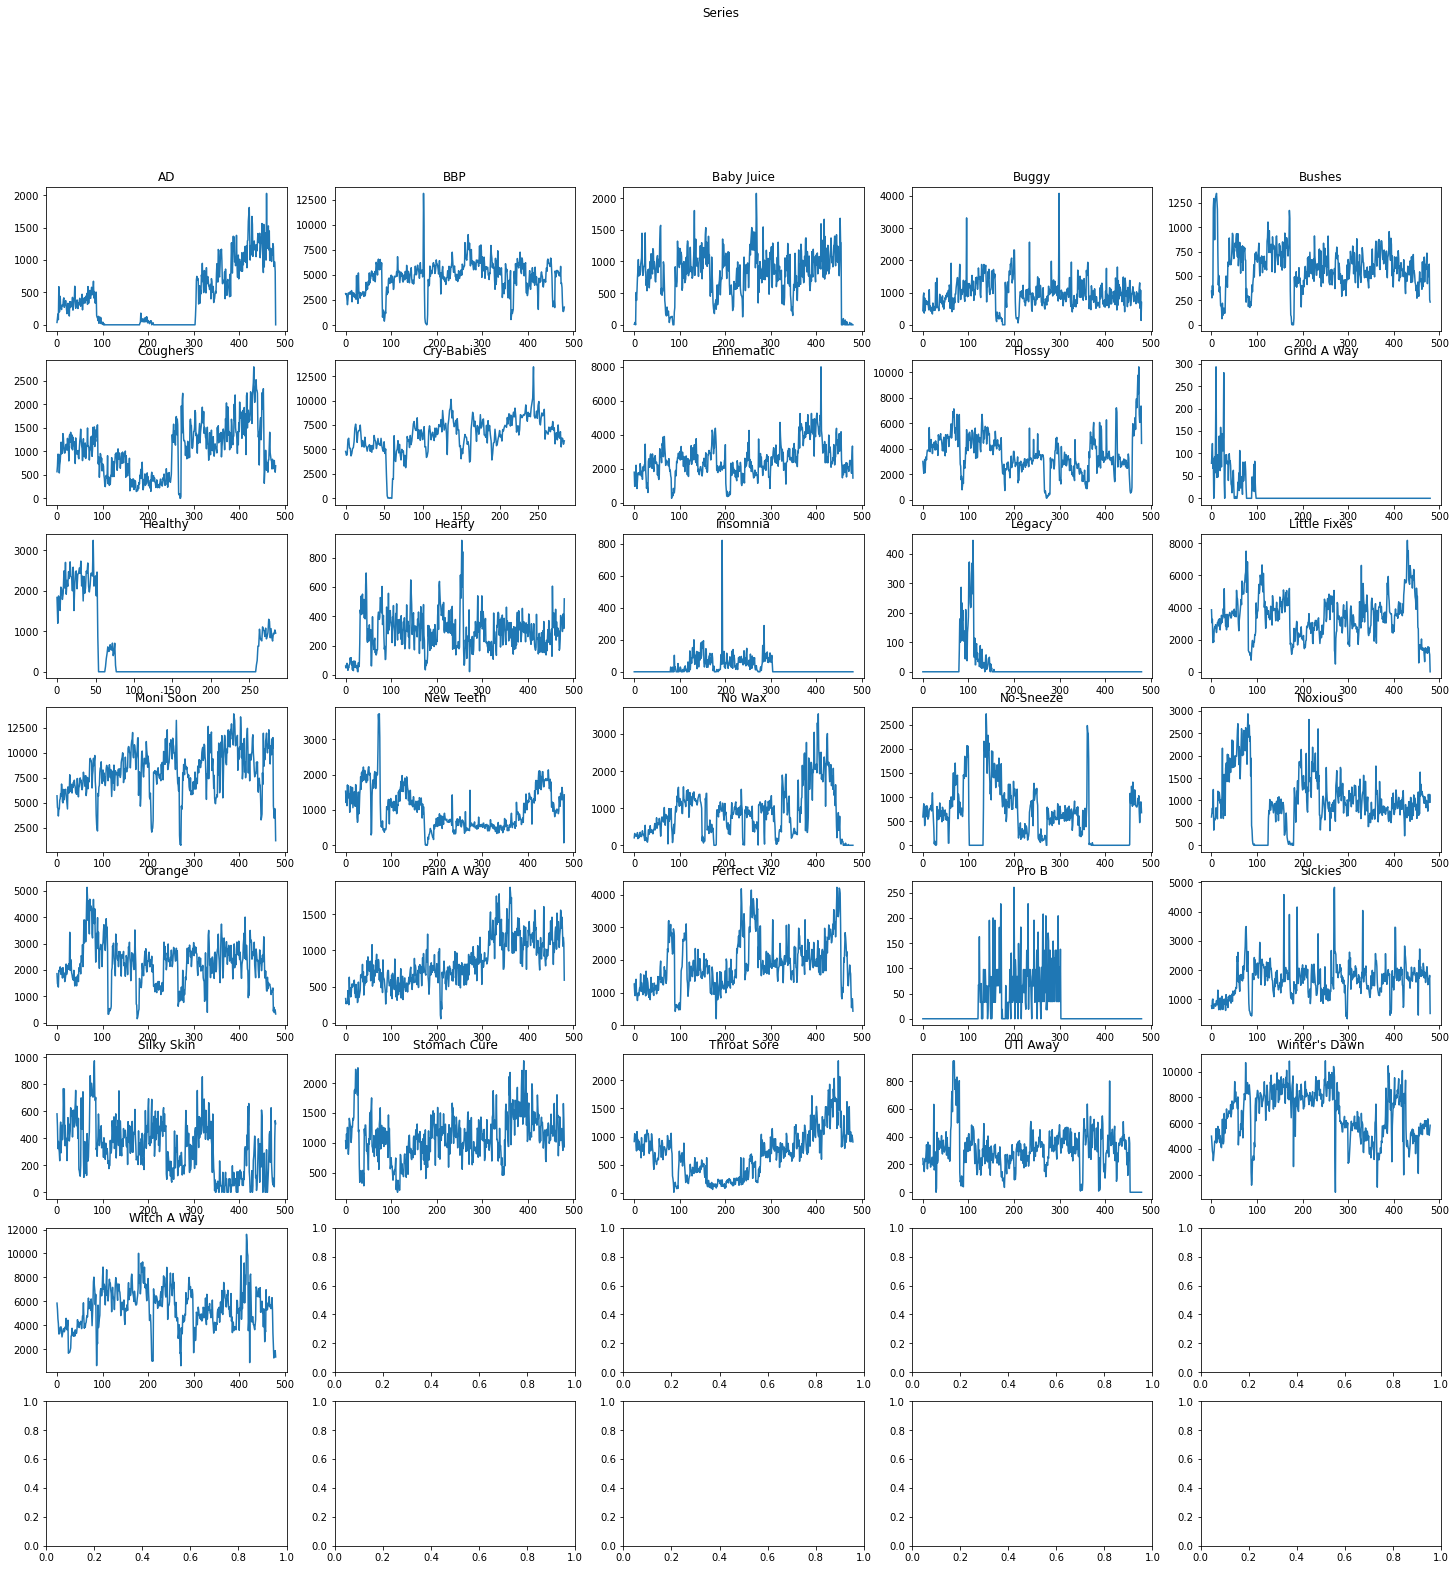

In [164]:
fig, axs = plt.subplots(8,5,figsize=(25,25))
fig.suptitle('Series')
for i in range(8):
    for j in range(5):
        if i*5+j+1>len(mySeries): # pass the others that we can't fill
            continue
        axs[i, j].plot(mySeries[i*5+j].values)
        axs[i, j].set_title(namesofMySeries[i*5+j])
plt.show()

In [165]:
series_lengths = {len(series) for series in mySeries}
print(series_lengths)

{481, 285}


In [166]:
max_len = max(series_lengths)
longest_series = None
for series in mySeries:
    if len(series) == max_len:
        longest_series = series

In [167]:
problems_index = []

for i in range(len(mySeries)):
    if len(mySeries[i])!= max_len:
        problems_index.append(i)
        mySeries[i] = mySeries[i].reindex(longest_series.index)

In [168]:
def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)
nan_counter(mySeries)

2


In [169]:
for i in problems_index:
    mySeries[i].interpolate(limit_direction="both",inplace=True)
nan_counter(mySeries)

0


In [170]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [171]:
print("max: "+str(max(mySeries[0]))+"\tmin: "+str(min(mySeries[0])))
print(mySeries[0][:5])

max: 1.0	min: 0.0
[0.01786884 0.05061196 0.08241929 0.03887015 0.29008792]


In [415]:
som_x = som_y = 2
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.1, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 50000)

In [416]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

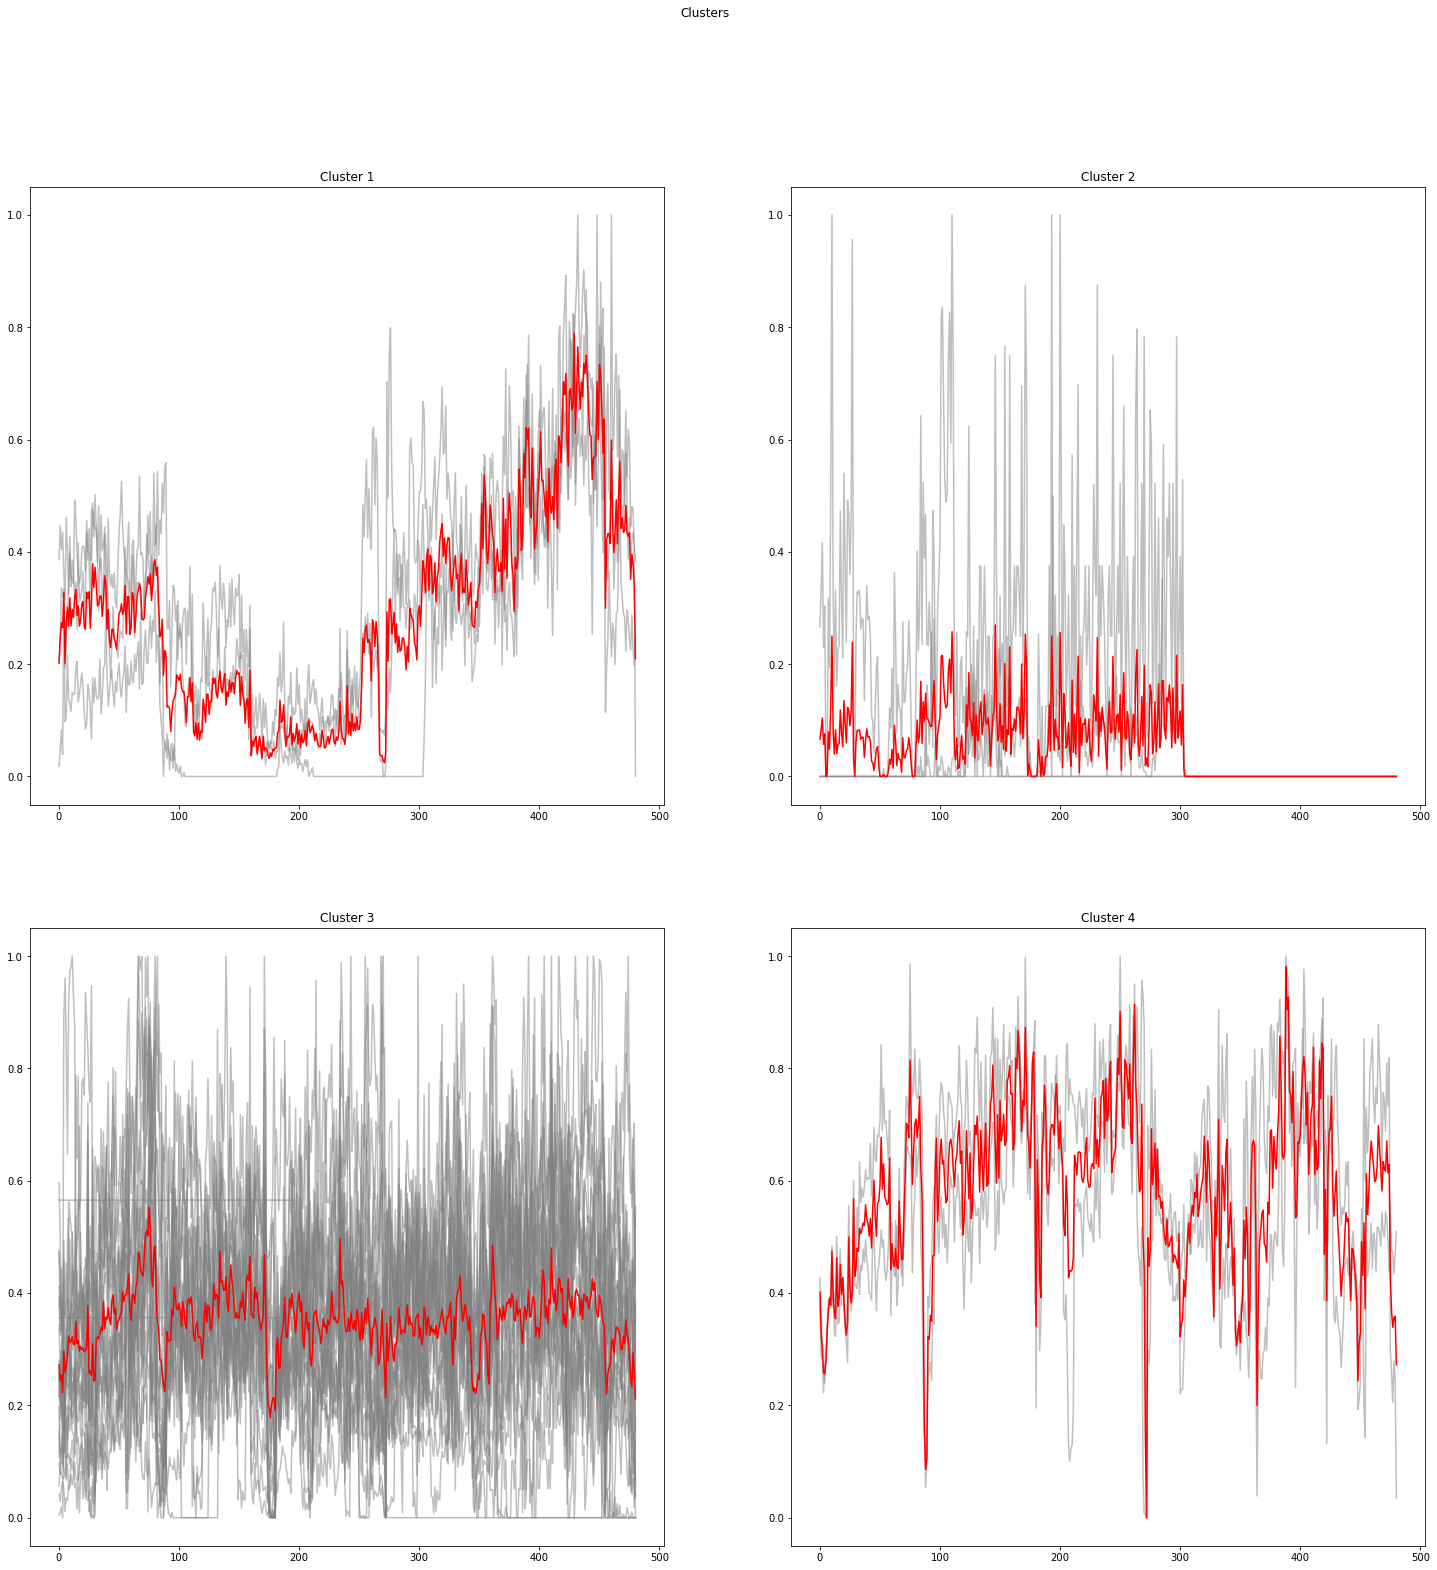

In [417]:
win_map = som.win_map(mySeries)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

In [418]:
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

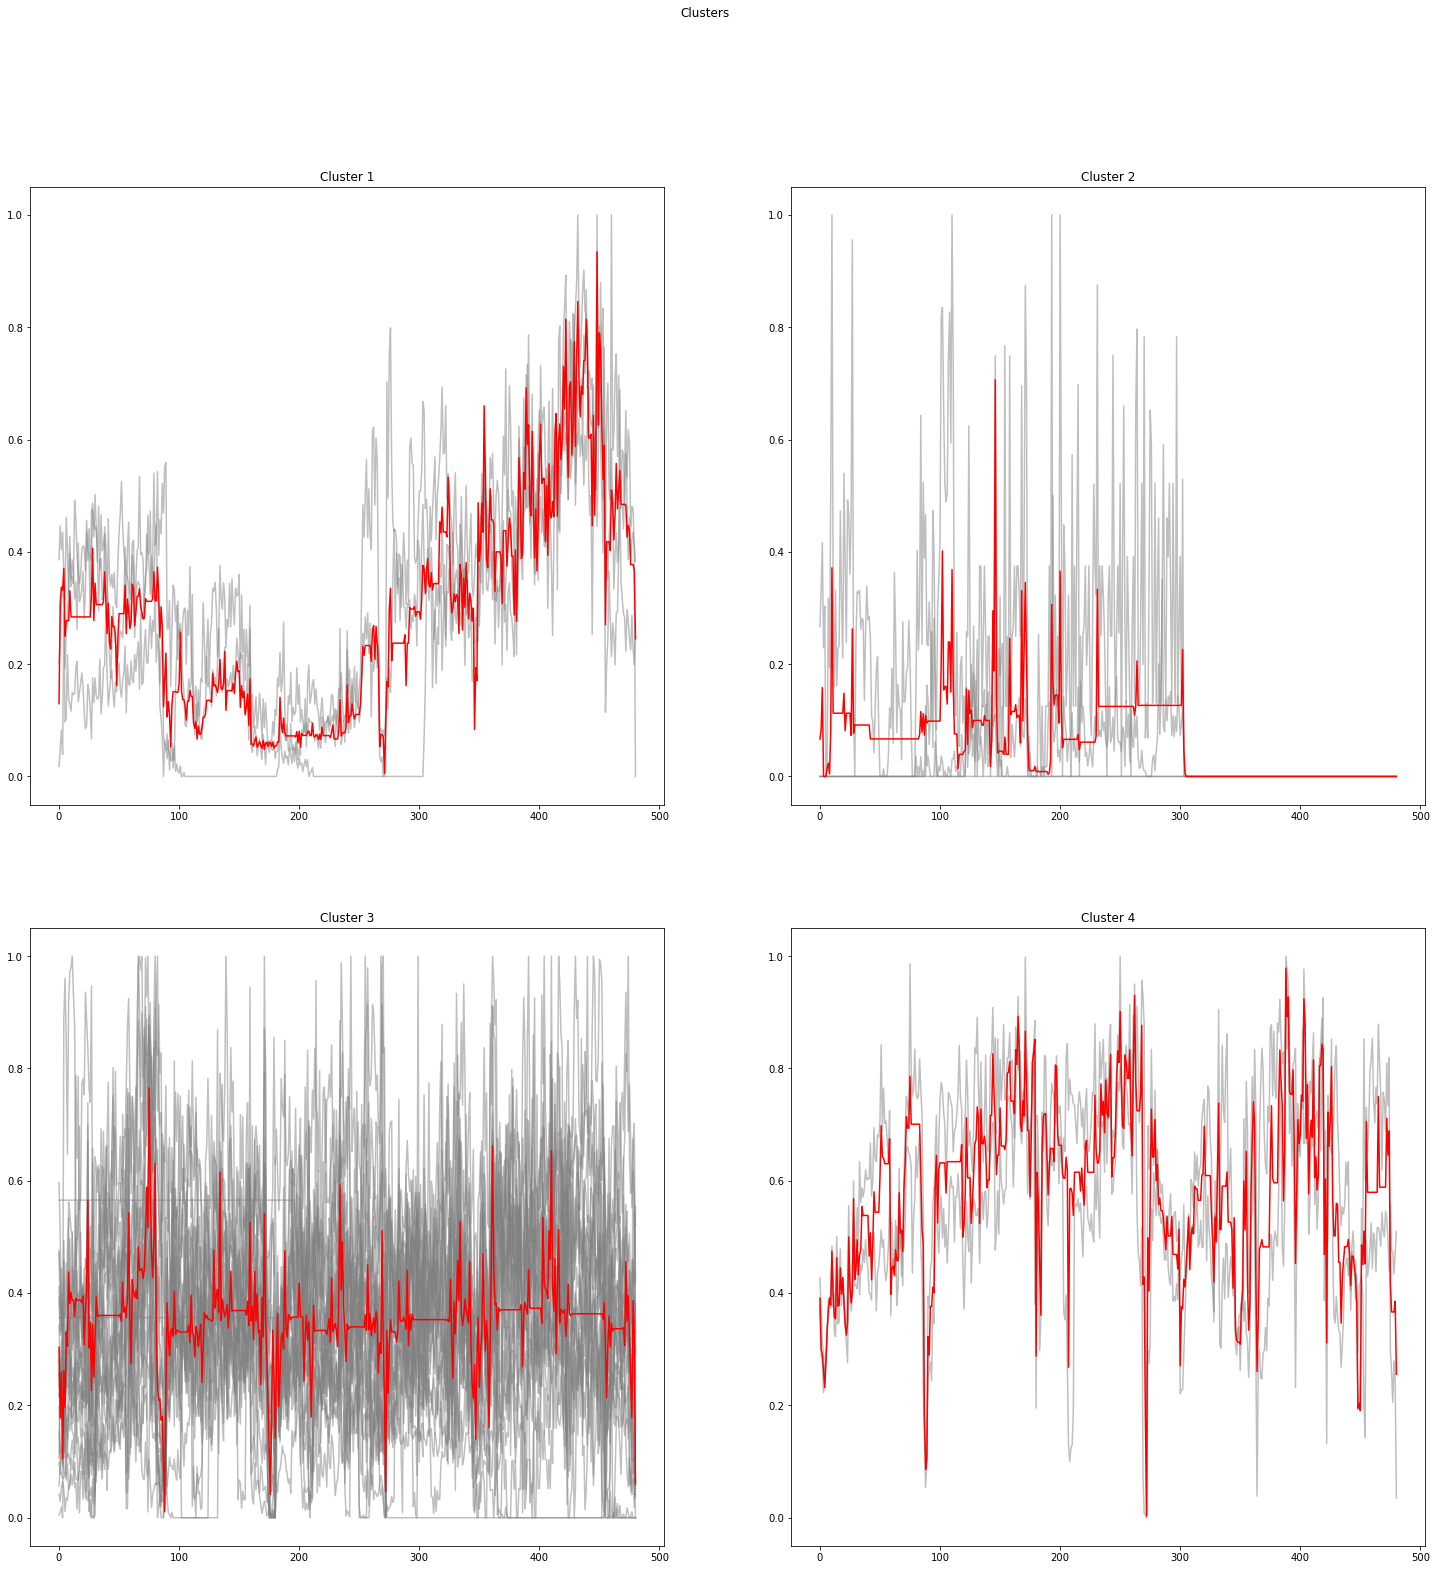

In [419]:
win_map = som.win_map(mySeries)

plot_som_series_dba_center(som_x, som_y, win_map)

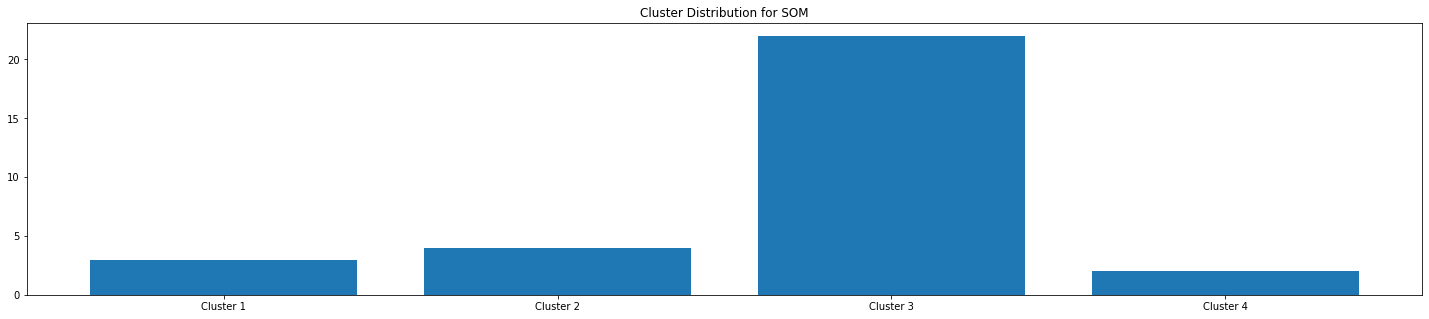

In [420]:
cluster_c = []
cluster_n = []
for x in range(som_x):
    for y in range(som_y):
        cluster = (x,y)
        if cluster in win_map.keys():
            cluster_c.append(len(win_map[cluster]))
        else:
            cluster_c.append(0)
        cluster_number = x*som_y+y+1
        cluster_n.append(f"Cluster {cluster_number}")

plt.figure(figsize=(25,5))
plt.title("Cluster Distribution for SOM")
plt.bar(cluster_n,cluster_c)
plt.show()

In [421]:
cluster_map = []
for idx in range(len(mySeries)):
    winner_node = som.winner(mySeries[idx])
    cluster_map.append((namesofMySeries[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

Cluster
Series                  
AD             Cluster 1
Throat Sore    Cluster 1
Coughers       Cluster 1
Legacy         Cluster 2
Insomnia       Cluster 2
Pro B          Cluster 2
Grind A Way    Cluster 2
Noxious        Cluster 3
Orange         Cluster 3
Pain A Way     Cluster 3
Perfect Viz    Cluster 3
Sickies        Cluster 3
Silky Skin     Cluster 3
Stomach Cure   Cluster 3
UTI Away       Cluster 3
No-Sneeze      Cluster 3
No Wax         Cluster 3
Witch A Way    Cluster 3
Little Fixes   Cluster 3
Hearty         Cluster 3
Healthy        Cluster 3
Flossy         Cluster 3
Ennematic      Cluster 3
Cry-Babies     Cluster 3
Bushes         Cluster 3
Buggy          Cluster 3
Baby Juice     Cluster 3
BBP            Cluster 3
New Teeth      Cluster 3
Winter's Dawn  Cluster 4
Moni Soon      Cluster 4

In [422]:
cluster_count = math.ceil(math.sqrt(len(mySeries))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=1)

labels = km.fit_predict(mySeries)

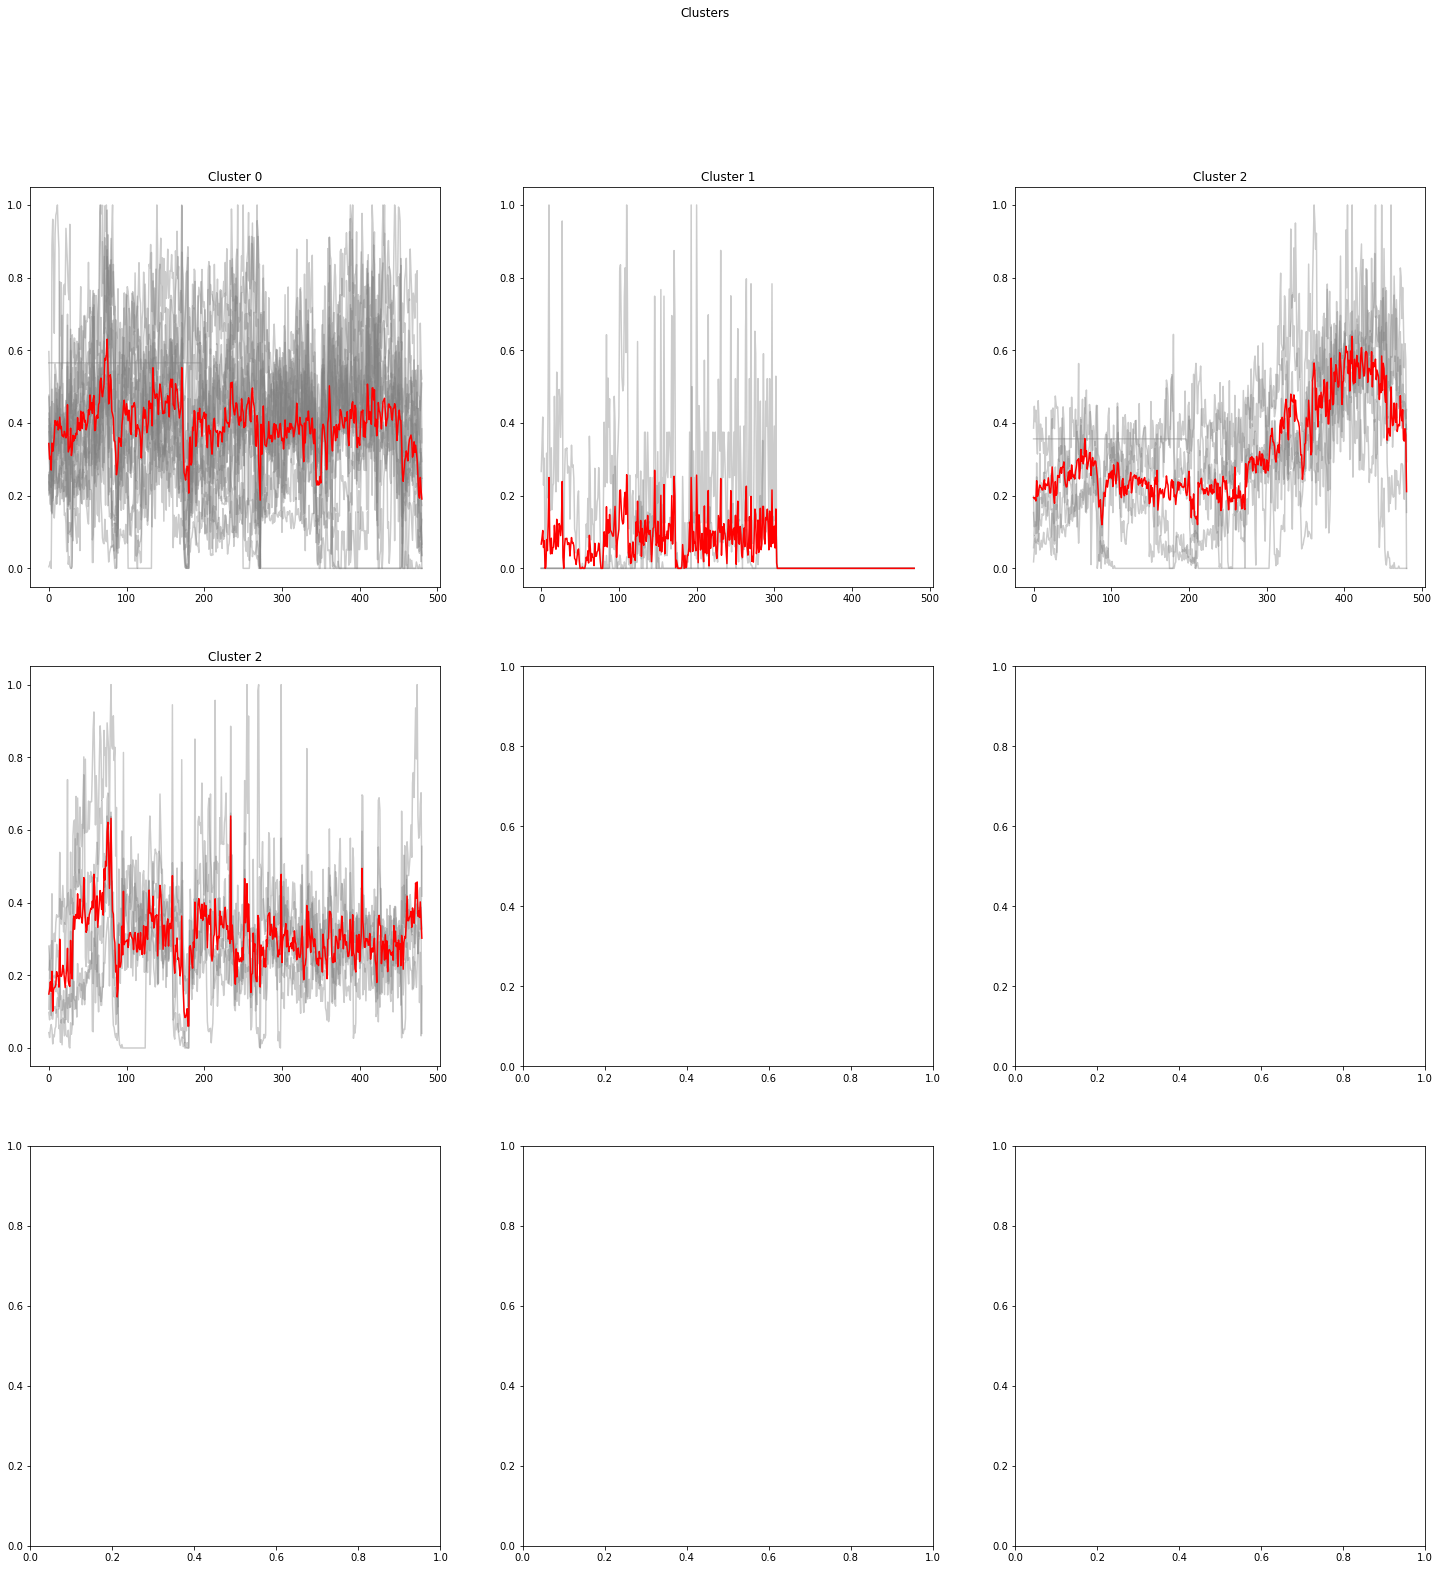

In [428]:
km = TimeSeriesKMeans(n_clusters=4,metric="dtw", random_state=9)

labels = km.fit_predict(mySeries)

plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

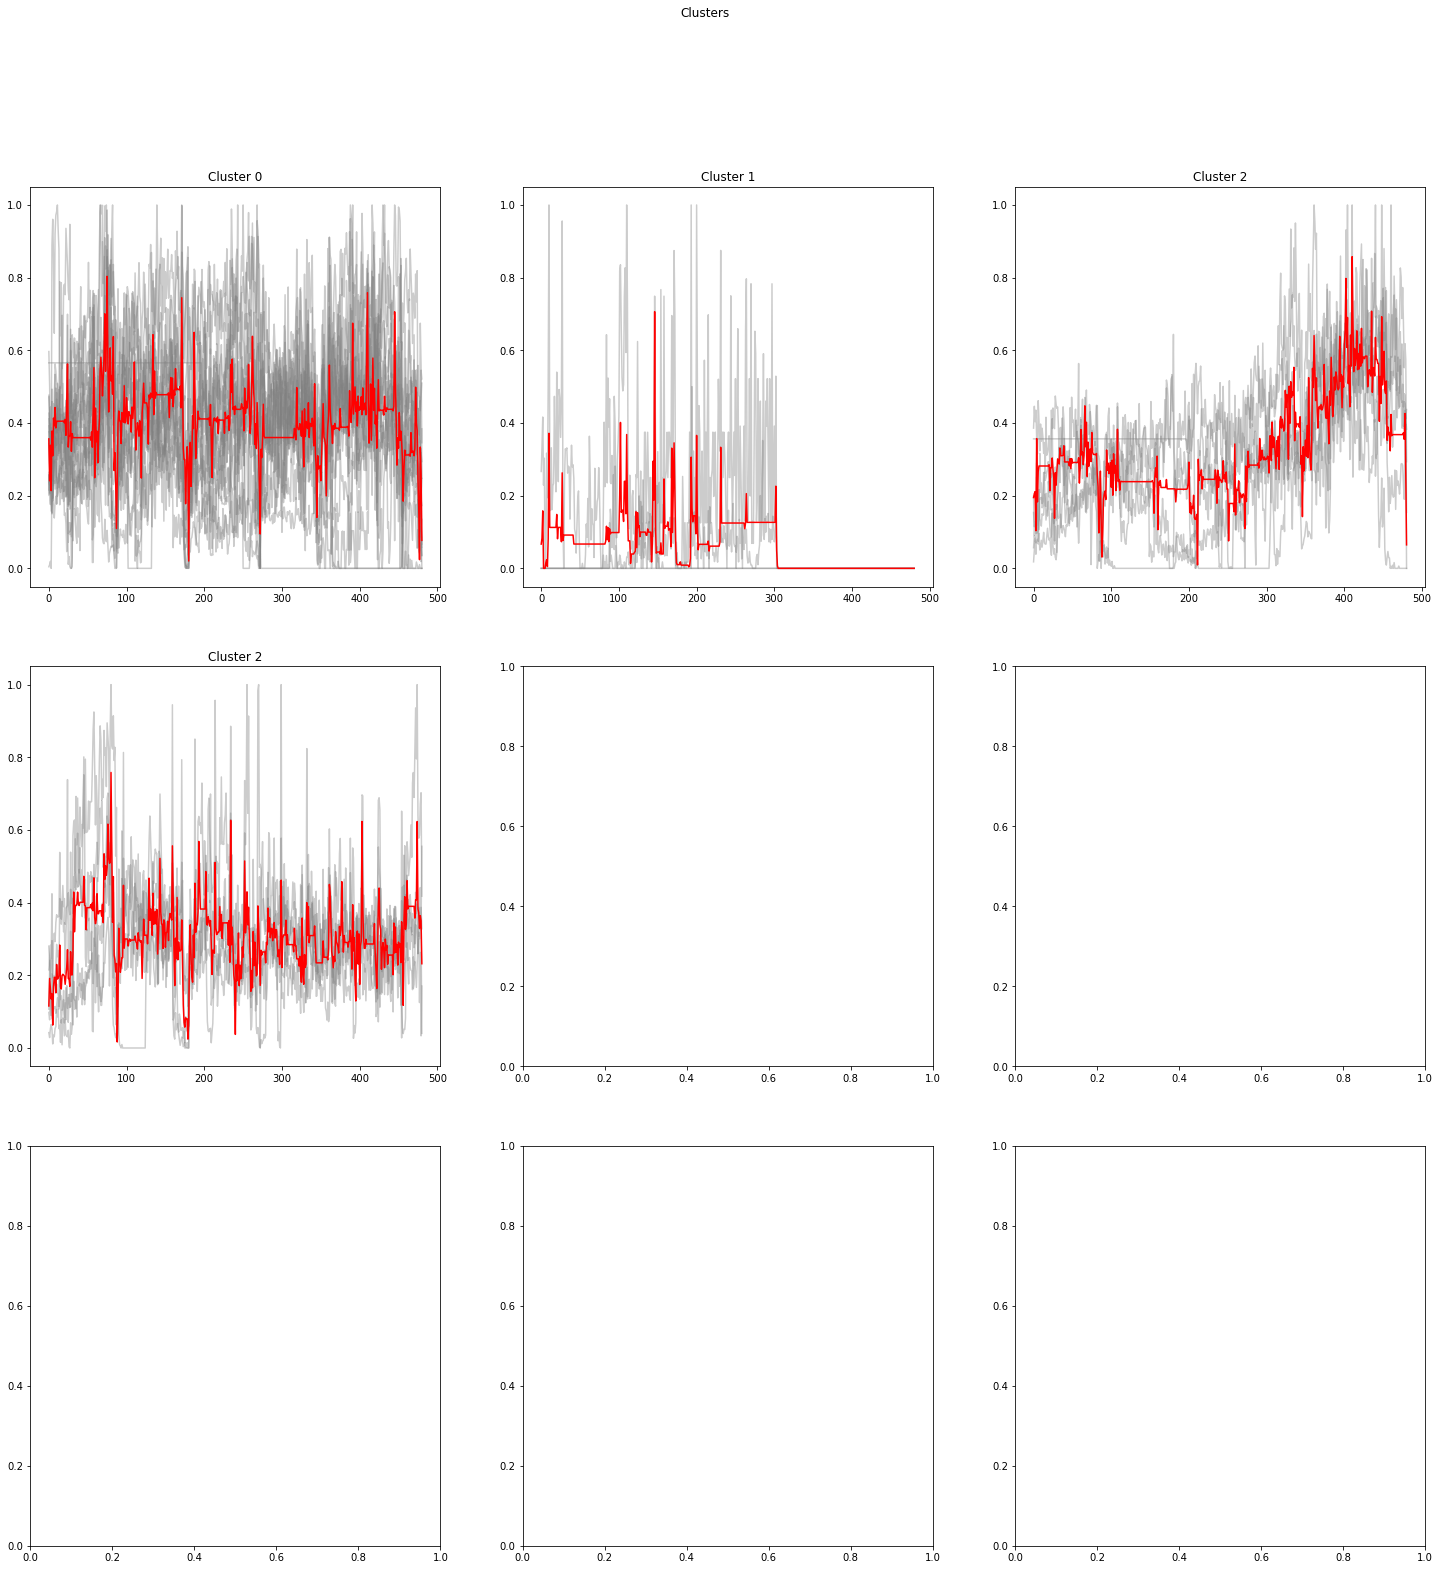

In [429]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

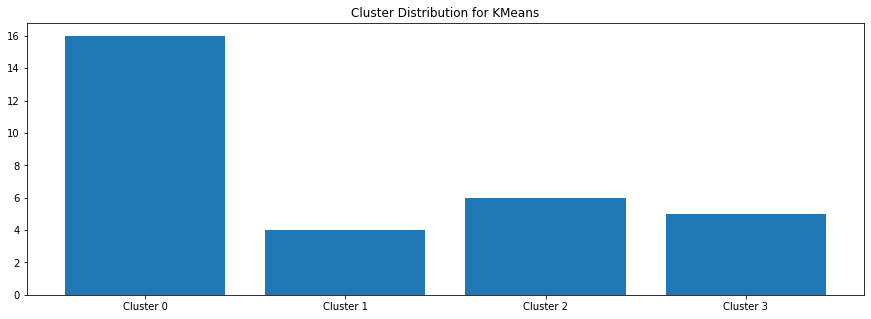

In [430]:

cluster_c = [len(labels[labels==i]) for i in range(4)]
cluster_n = ["Cluster "+str(i) for i in range(4)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [289]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
df_cluster=pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Brand","Cluster2"]).sort_values(by="Cluster2").set_index("Brand")
df_cluster

Cluster2
Brand                   
Moni Soon      Cluster 0
UTI Away       Cluster 0
Stomach Cure   Cluster 0
Silky Skin     Cluster 0
Perfect Viz    Cluster 0
Orange         Cluster 0
Noxious        Cluster 0
No-Sneeze      Cluster 0
New Teeth      Cluster 0
Winter's Dawn  Cluster 0
Little Fixes   Cluster 0
Witch A Way    Cluster 0
Healthy        Cluster 0
Flossy         Cluster 0
BBP            Cluster 0
Baby Juice     Cluster 0
Coughers       Cluster 0
Bushes         Cluster 0
Insomnia       Cluster 1
Legacy         Cluster 1
Grind A Way    Cluster 1
Buggy          Cluster 1
Pro B          Cluster 1
Throat Sore    Cluster 2
Pain A Way     Cluster 2
Hearty         Cluster 2
Cry-Babies     Cluster 2
Ennematic      Cluster 2
No Wax         Cluster 2
Sickies        Cluster 2
AD             Cluster 2

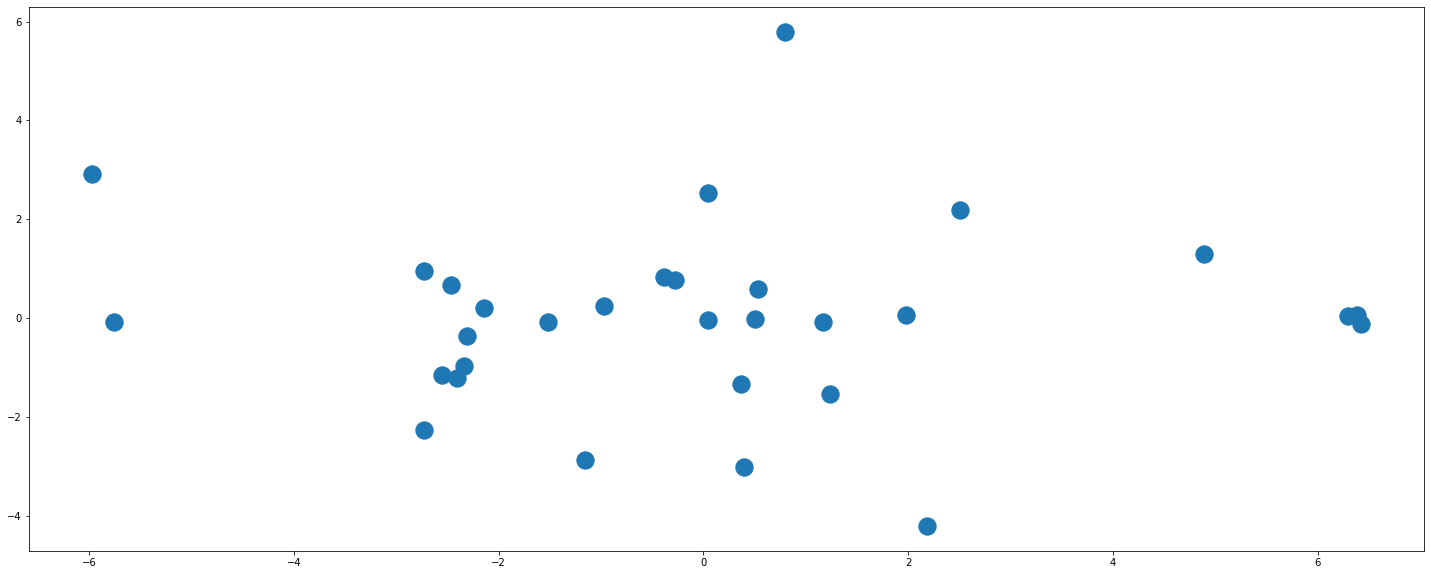

In [320]:
pca = PCA(n_components=2)

mySeries_transformed = pca.fit_transform(mySeries)

plt.figure(figsize=(25,10))
plt.scatter(mySeries_transformed[:,0],mySeries_transformed[:,1], s=300)
plt.show()

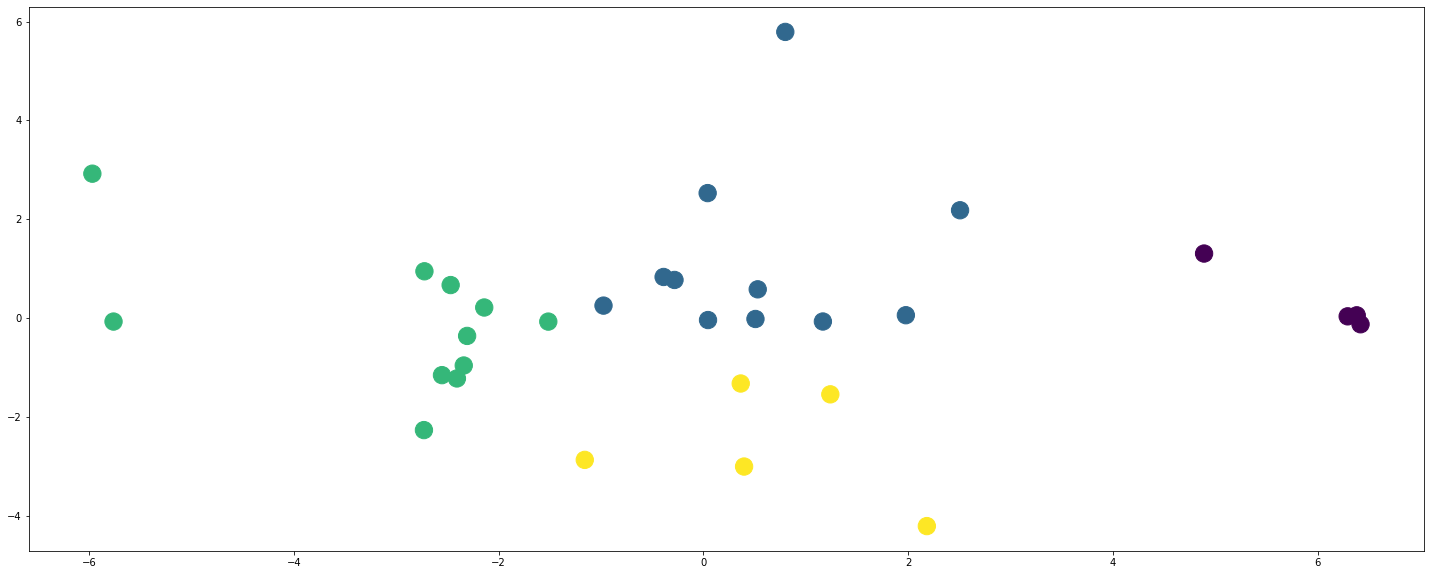

In [462]:
kmeans = KMeans(n_clusters=4,max_iter=5000,random_state=8)

labels = kmeans.fit_predict(mySeries_transformed)

plt.figure(figsize=(25,10))
plt.scatter(mySeries_transformed[:, 0], mySeries_transformed[:, 1], c=labels, s=300)
plt.show()

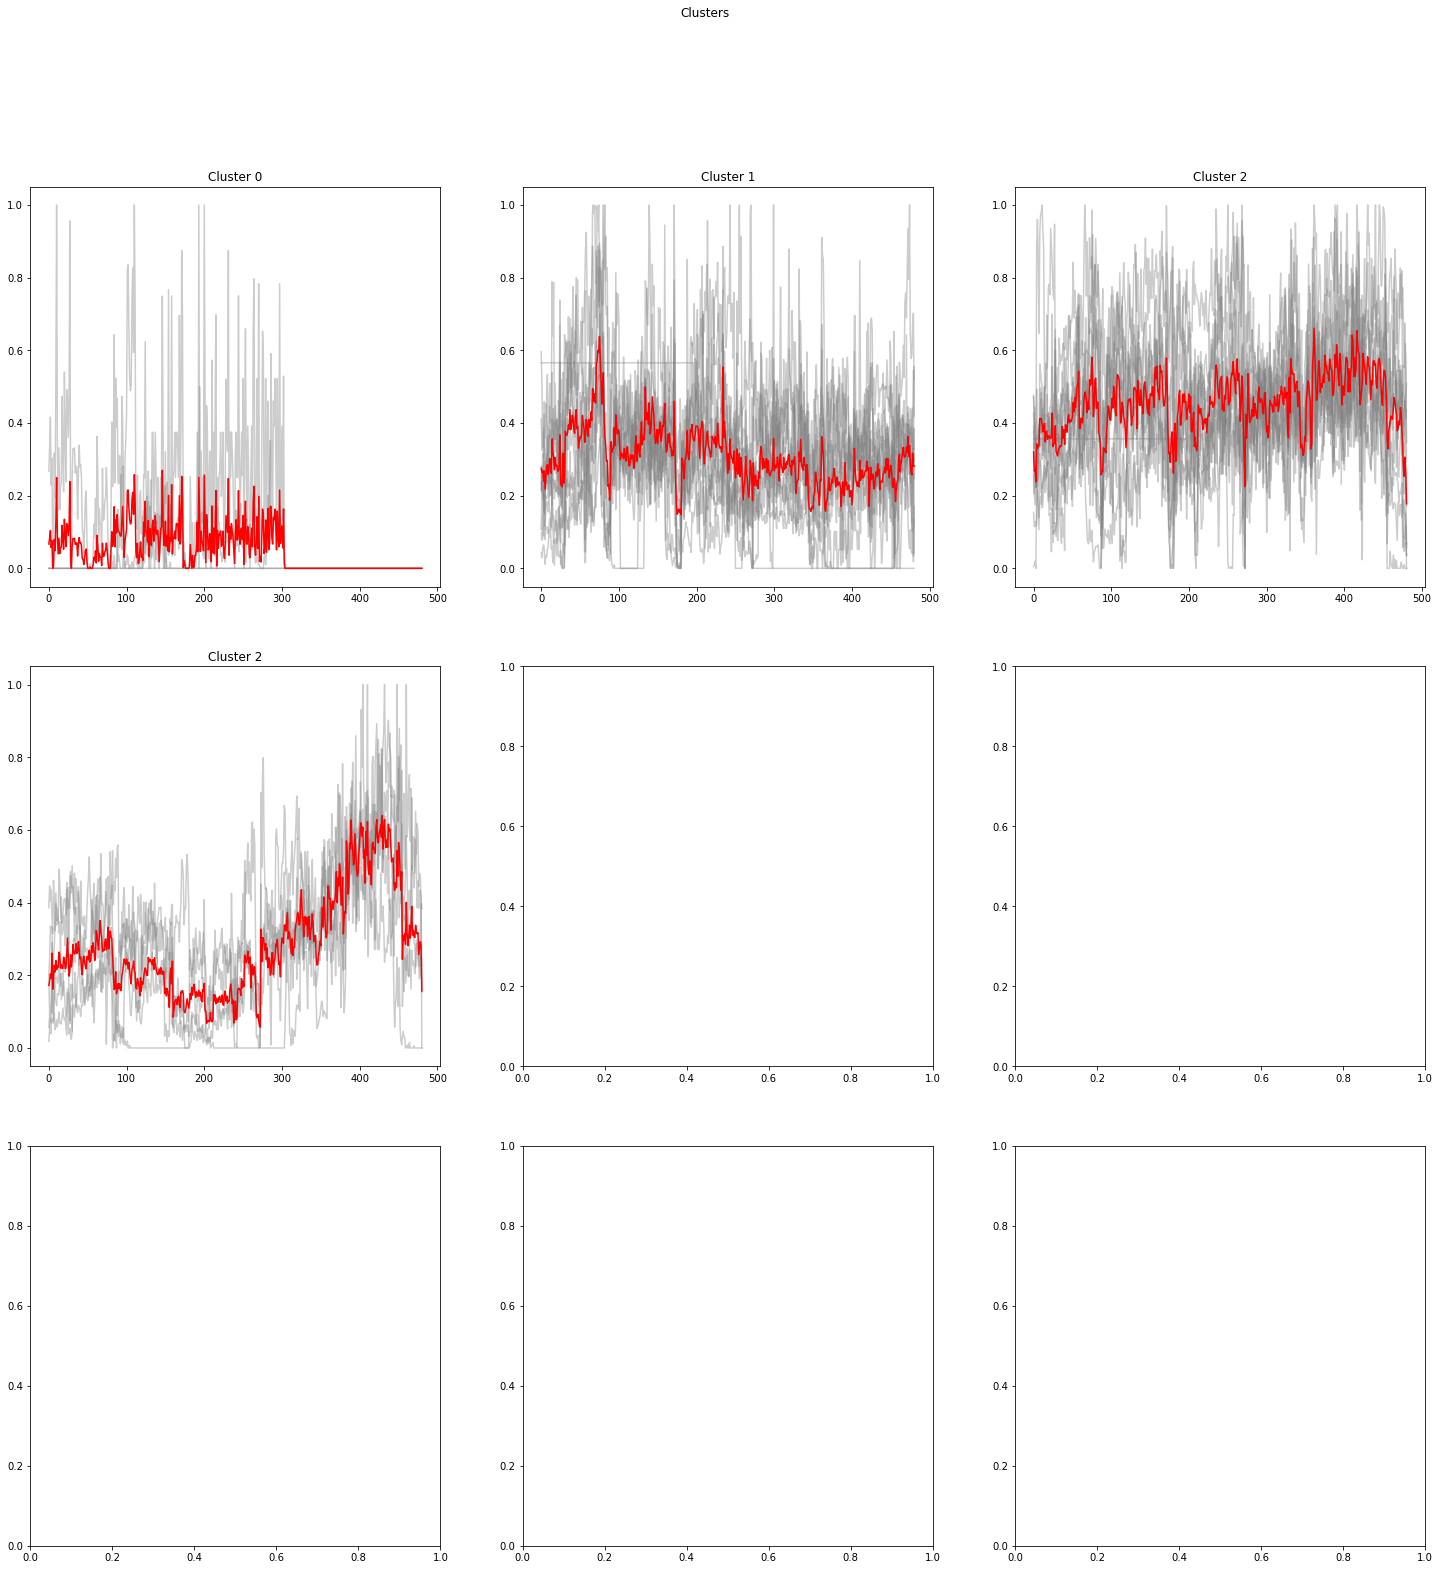

In [463]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

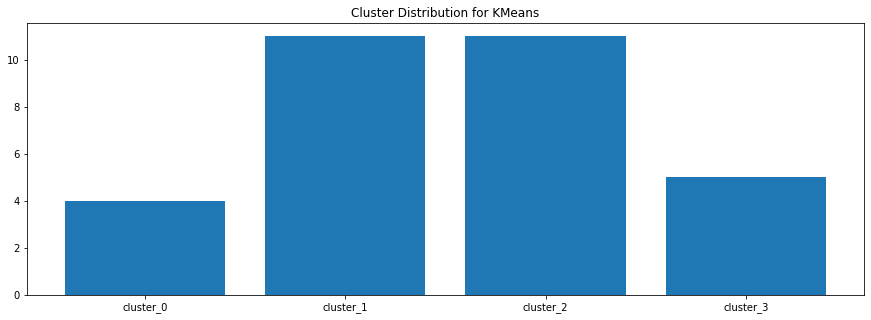

In [464]:
cluster_c = [len(labels[labels==i]) for i in range(4)]
cluster_n = ["cluster_"+str(i) for i in range(4)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [391]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
df_cluster = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Brand","Cluster4"]).sort_values(by="Cluster4").set_index("Brand")
df_cluster

Cluster4
Brand                   
Pro B          Cluster 0
Legacy         Cluster 0
Grind A Way    Cluster 0
Insomnia       Cluster 0
Moni Soon      Cluster 1
Stomach Cure   Cluster 1
Perfect Viz    Cluster 1
Pain A Way     Cluster 1
Orange         Cluster 1
Winter's Dawn  Cluster 1
Little Fixes   Cluster 1
Witch A Way    Cluster 1
Bushes         Cluster 1
Cry-Babies     Cluster 1
Baby Juice     Cluster 1
UTI Away       Cluster 2
BBP            Cluster 2
Silky Skin     Cluster 2
Sickies        Cluster 2
Buggy          Cluster 2
Hearty         Cluster 2
Healthy        Cluster 2
Noxious        Cluster 2
No-Sneeze      Cluster 2
New Teeth      Cluster 2
Flossy         Cluster 2
No Wax         Cluster 3
Ennematic      Cluster 3
Throat Sore    Cluster 3
Coughers       Cluster 3
AD             Cluster 3

In [392]:
df = pd.merge(df, df_cluster, how='left', on=['Brand'])
df.head()

Unnamed: 0   Brand  AMS Campaign ID  Campaign Budget Campaign Start Date  \
0           0  Legacy  148975094189514             40.0          2017-07-15   
1           1  Legacy  148975094189514             40.0          2017-07-15   
2           2  Legacy  148975094189514             40.0          2017-07-15   
3           3  Legacy  148975094189514             40.0          2017-07-15   
4           4  Legacy  148975094189514             40.0          2017-07-15   

  Campaign Status      Campaign Type  Clicks  Cost Targeting type  ...  \
0          paused  sponsoredProducts       0   0.0           auto  ...   
1          paused  sponsoredProducts       0   0.0           auto  ...   
2          paused  sponsoredProducts       0   0.0           auto  ...   
3          paused  sponsoredProducts       0   0.0           auto  ...   
4          paused  sponsoredProducts       0   0.0           auto  ...   

   report year  report month report day  report weekday  report quarter  \
0         2022             4          1               4               2   
1         2022             4          8               4               2   
2         2022             4         15               4               2   
3         2022             4         22               4               2   
4         2022             3          4               4               1   

   Time_pattern    Cluster   Cluster2   Cluster3   Cluster4  
0     Cluster 2  Cluster 1  Cluster 1  Cluster 0  Cluster 0  
1     Cluster 2  Cluster 1  Cluster 1  Cluster 0  Cluster 0  
2     Cluster 2  Cluster 1  Cluster 1  Cluster 0  Cluster 0  
3     Cluster 2  Cluster 1  Cluster 1  Cluster 0  Cluster 0  
4     Cluster 2  Cluster 1  Cluster 1  Cluster 0  Cluster 0  

[5 rows x 28 columns]

In [393]:
a=df.groupby(['Cluster','Cluster4'])['Brand'].value_counts()
a= pd.DataFrame(a)
a

Brand
Cluster   Cluster4  Brand               
Cluster 0 Cluster 1 Winter's Dawn  62042
                    Little Fixes   59649
                    Witch A Way    48806
                    Moni Soon      45912
                    Perfect Viz    42381
                    Orange          8563
                    Stomach Cure    7727
                    Bushes          6237
                    Baby Juice      3850
          Cluster 2 BBP            56941
                    Healthy        49330
                    Silky Skin     16275
                    New Teeth      12686
                    No-Sneeze       7698
                    UTI Away        4950
          Cluster 3 Coughers       20345
Cluster 1 Cluster 0 Legacy         12923
                    Grind A Way     8658
                    Insomnia        2625
                    Pro B           1680
Cluster 2 Cluster 1 Cry-Babies     61189
                    Pain A Way     40874
          Cluster 3 Ennematic      59462
                    AD             19238
                    No Wax          7733
                    Throat Sore     6250
Cluster 3 Cluster 2 Flossy         68300
                    Sickies        19794
                    Noxious        10672
                    Buggy           7614
                    Hearty          3848

In [292]:
from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_yearly
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
py.init_notebook_mode()
%matplotlib inline

In [317]:
def timeseries(result, cluster):
    WD = df.loc[df[result] == cluster]
    WD = pd.DataFrame(WD)
    WDSTD = WD.groupby('Report Date')['Sales 14D'].mean()
    WDSTD= pd.DataFrame(WDSTD)
    WDSTD.columns=['Sales']
    WDSTD['Report Date'] = pd.to_datetime(WDSTD.index)
    WDSTD = WDSTD.reset_index(drop='index')
    WDSTD.columns = ['y','ds']
    m = Prophet(changepoint_prior_scale=1,changepoint_range=0.9)
    m.add_country_holidays(country_name='US')
    m.fit(WDSTD)
    
    future= m.make_future_dataframe(periods=30, freq='d')
    fcst=m.predict(future)
    fig= m.plot(fcst)
    a = add_changepoints_to_plot(fig.gca(), m, fcst)
    fig = m.plot_components(fcst)
    
    m = Prophet(yearly_seasonality=10).fit(WDSTD)
    a = plot_yearly(m)
    
    m = Prophet(weekly_seasonality=False)
    m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
    forecast = m.fit(WDSTD).predict(future)
    fig = m.plot_components(forecast)

23:04:29 - cmdstanpy - INFO - Chain [1] start processing
23:04:30 - cmdstanpy - INFO - Chain [1] done processing
23:04:30 - cmdstanpy - INFO - Chain [1] start processing
23:04:30 - cmdstanpy - INFO - Chain [1] done processing
23:04:30 - cmdstanpy - INFO - Chain [1] start processing
23:04:30 - cmdstanpy - INFO - Chain [1] done processing


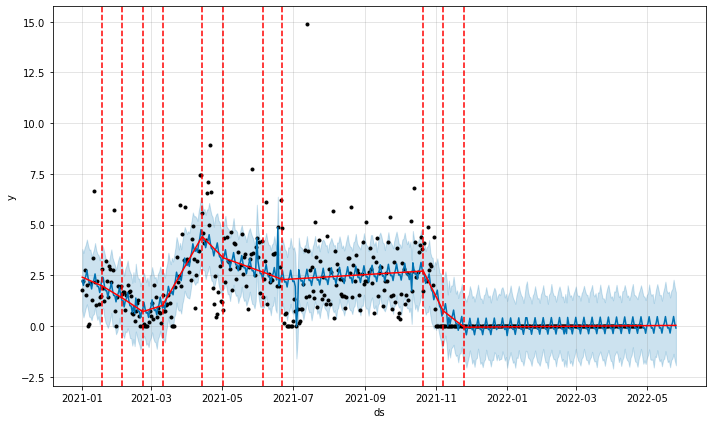

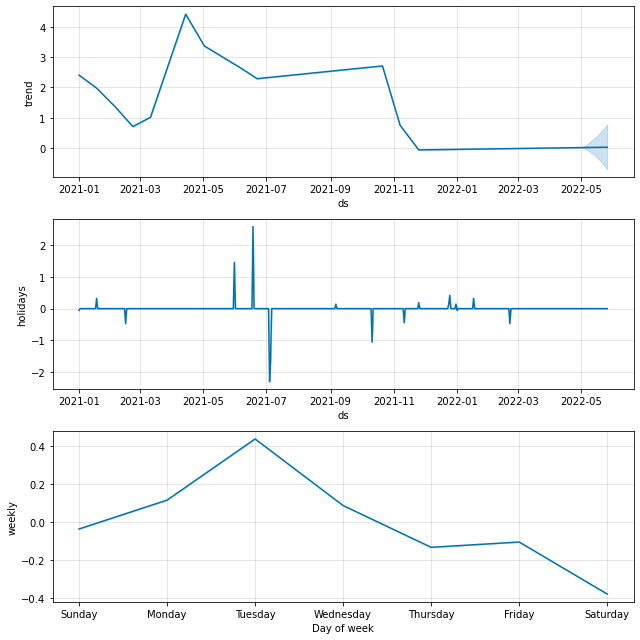

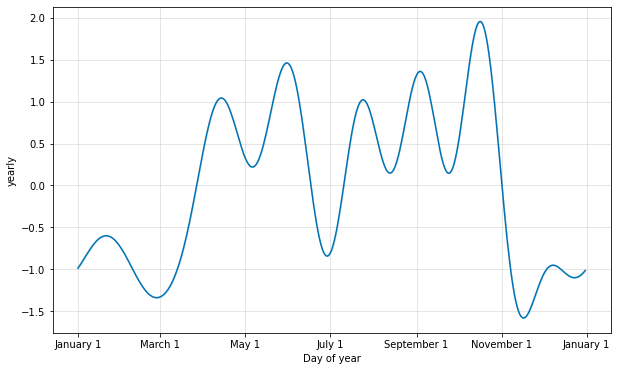

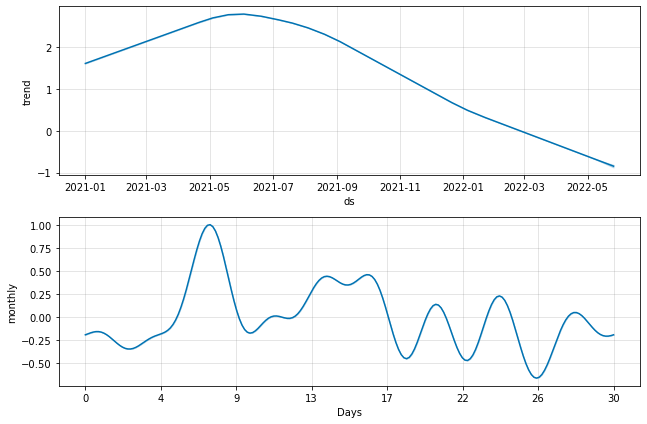

In [394]:
timeseries('Cluster4','Cluster 0')

23:04:58 - cmdstanpy - INFO - Chain [1] start processing
23:04:58 - cmdstanpy - INFO - Chain [1] done processing
23:04:59 - cmdstanpy - INFO - Chain [1] start processing
23:04:59 - cmdstanpy - INFO - Chain [1] done processing
23:04:59 - cmdstanpy - INFO - Chain [1] start processing
23:04:59 - cmdstanpy - INFO - Chain [1] done processing


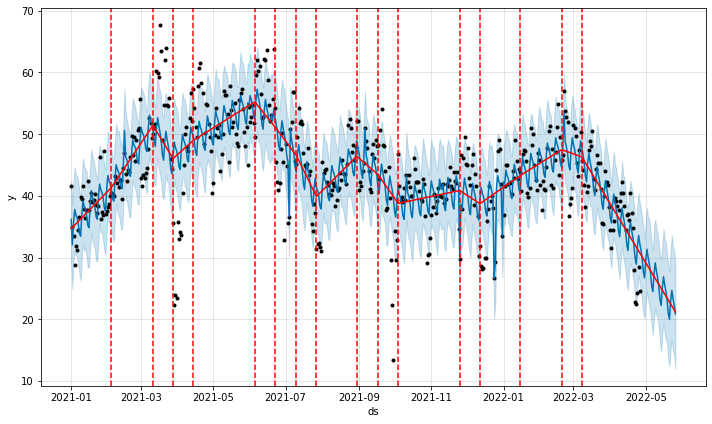

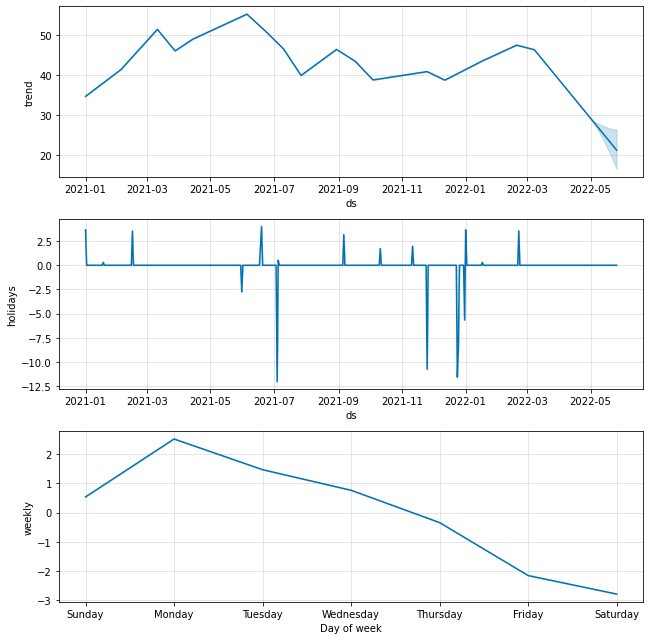

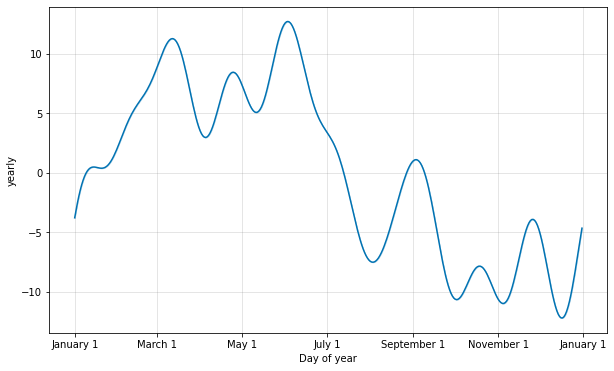

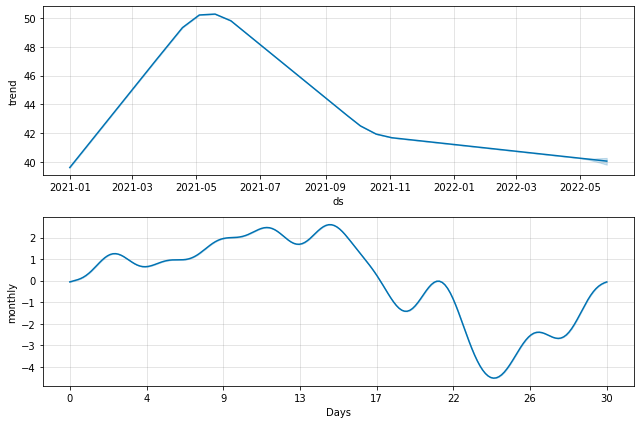

In [395]:
timeseries('Cluster4','Cluster 1')

23:05:08 - cmdstanpy - INFO - Chain [1] start processing
23:05:08 - cmdstanpy - INFO - Chain [1] done processing
23:05:09 - cmdstanpy - INFO - Chain [1] start processing
23:05:09 - cmdstanpy - INFO - Chain [1] done processing
23:05:09 - cmdstanpy - INFO - Chain [1] start processing
23:05:09 - cmdstanpy - INFO - Chain [1] done processing


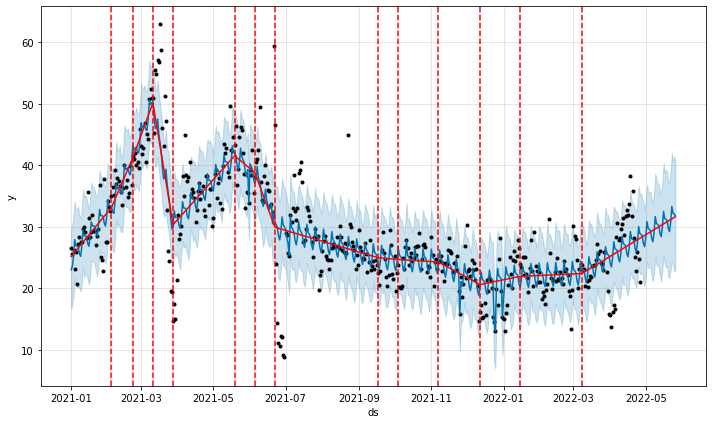

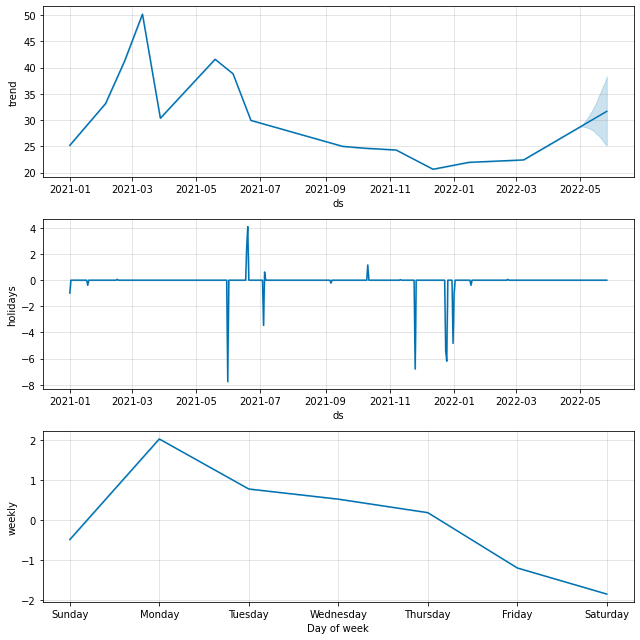

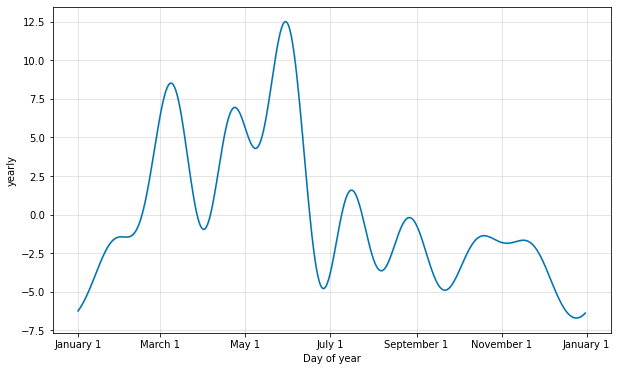

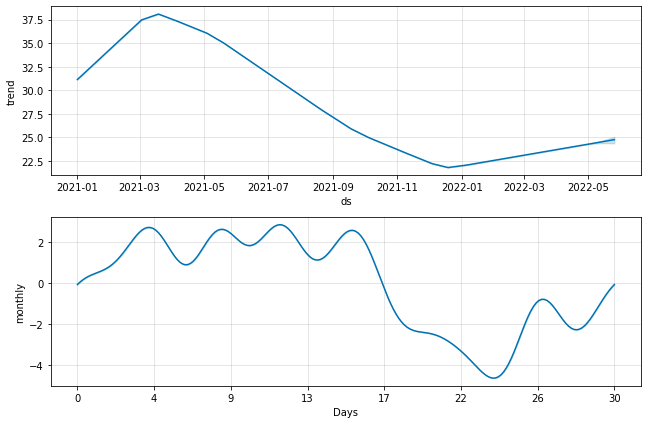

In [396]:
timeseries('Cluster4','Cluster 2')

23:05:49 - cmdstanpy - INFO - Chain [1] start processing
23:05:49 - cmdstanpy - INFO - Chain [1] done processing
23:05:50 - cmdstanpy - INFO - Chain [1] start processing
23:05:50 - cmdstanpy - INFO - Chain [1] done processing
23:05:50 - cmdstanpy - INFO - Chain [1] start processing
23:05:50 - cmdstanpy - INFO - Chain [1] done processing


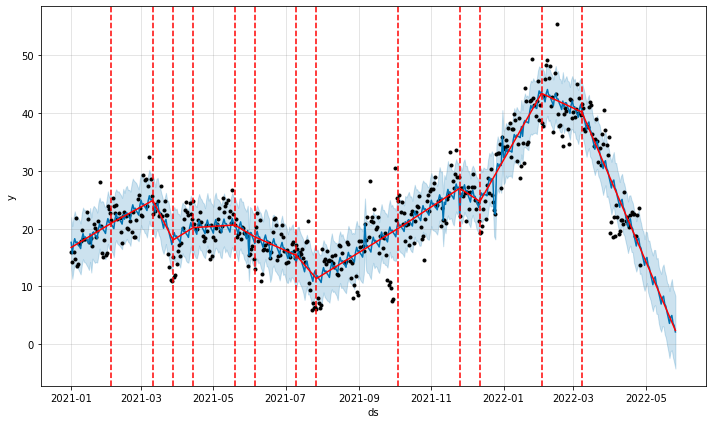

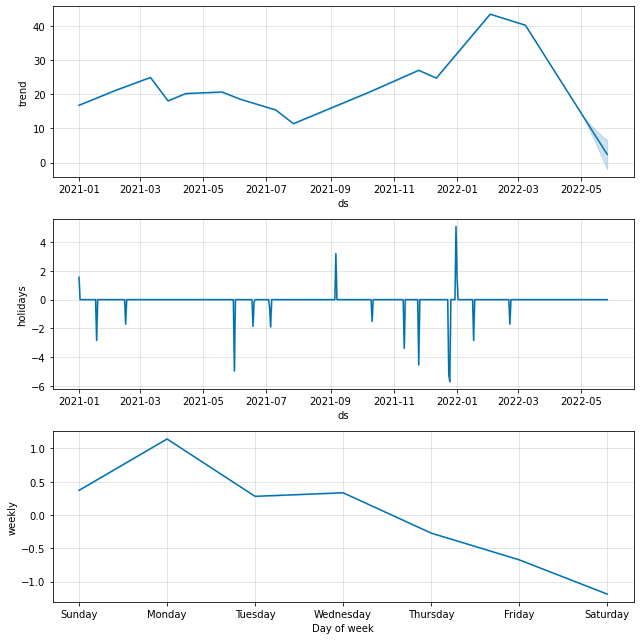

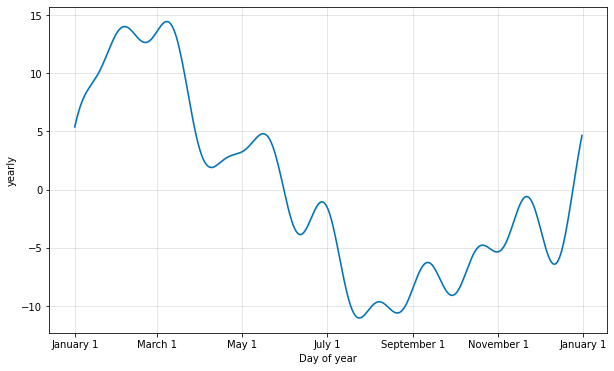

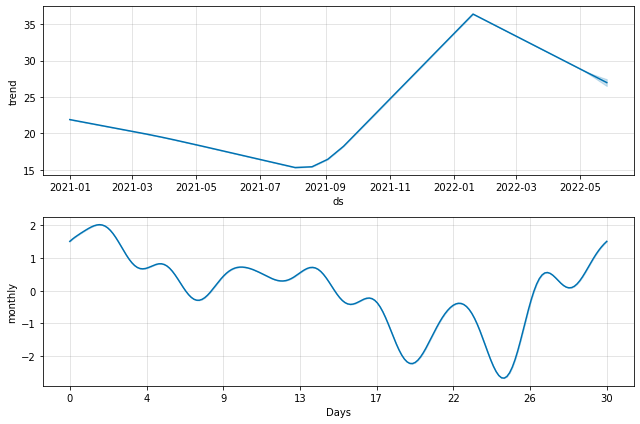

In [397]:
timeseries('Cluster4','Cluster 3')

In [405]:
data=df.drop(['Time_pattern','Cluster','Cluster2','Cluster3'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796268 entries, 0 to 796267
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               796268 non-null  int64         
 1   Brand                    796268 non-null  object        
 2   AMS Campaign ID          796268 non-null  int64         
 3   Campaign Budget          796268 non-null  float64       
 4   Campaign Start Date      763526 non-null  datetime64[ns]
 5   Campaign Status          796268 non-null  object        
 6   Campaign Type            796268 non-null  object        
 7   Clicks                   796268 non-null  int64         
 8   Cost                     796268 non-null  float64       
 9   Targeting type           796268 non-null  object        
 10  Impressions              796268 non-null  int64         
 11  Is Holiday               796268 non-null  int64         
 12  Report Date     

In [411]:
data['Cluster4'].replace('Cluster4','Cluster 4',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796268 entries, 0 to 796267
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               796268 non-null  int64         
 1   Brand                    796268 non-null  object        
 2   AMS Campaign ID          796268 non-null  int64         
 3   Campaign Budget          796268 non-null  float64       
 4   Campaign Start Date      763526 non-null  datetime64[ns]
 5   Campaign Status          796268 non-null  object        
 6   Campaign Type            796268 non-null  object        
 7   Clicks                   796268 non-null  int64         
 8   Cost                     796268 non-null  float64       
 9   Targeting type           796268 non-null  object        
 10  Impressions              796268 non-null  int64         
 11  Is Holiday               796268 non-null  int64         
 12  Report Date     

In [412]:
data['Cluster4'].value_counts()

Cluster 1    387230
Cluster 2    258108
Cluster 3    113028
Cluster 0     25886
Cluster 4     12016
Name: Cluster4, dtype: int64

In [414]:
data.to_csv('dataset_with_time_clusters4.csv')